In [25]:
import pandas as pd
import numpy as np

In [57]:
vs=pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Data From Kaggle\Vehicle sales/car_prices_3.csv")

In [58]:
vs.head(5)

,COMPANY,MODEL,TYPE,SIZE,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale Day,Sale month,Sale year
0,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,Dec,2014.0
1,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,Dec,2014.0
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,Jan,2015.0
3,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,Jan,2015.0
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,Dec,2014.0


In [59]:
vs=vs.drop(['COMPANY','state','color','interior','seller','sale Day','Sale month','Sale year'],axis=1)

In [60]:
vs.shape

(517050, 8)

In [61]:
vs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517050 entries, 0 to 517049
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   MODEL         507248 non-null  object 
 1   TYPE          507020 non-null  object 
 2   SIZE          504756 non-null  object 
 3   transmission  457268 non-null  object 
 4   condition     510556 non-null  float64
 5   odometer      516989 non-null  float64
 6   mmr           517039 non-null  float64
 7   sellingprice  517039 non-null  float64
dtypes: float64(4), object(4)
memory usage: 31.6+ MB


In [62]:
vs.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

In [63]:
vs.odometer.unique()

array([ 16639.,   9393.,   1331., ..., 111069.,  85155., 262065.])

In [67]:
vs.isnull().sum()[vs.isnull().sum()>0]

Series([], dtype: int64)

In [65]:
vs.odometer.value_counts()

1.0         1128
999999.0      70
10.0          28
21587.0       20
8.0           18
            ... 
181994.0       1
323563.0       1
91655.0        1
115593.0       1
262065.0       1
Name: odometer, Length: 168261, dtype: int64

In [66]:
vs.MODEL.fillna('Altima',inplace=True)
vs.TYPE.fillna('Base',inplace=True)
vs.SIZE.fillna('Sedan',inplace=True)
vs.transmission.fillna('automatic',inplace=True)
vs.mmr.fillna(vs.mmr.mean(),inplace=True)
vs.dropna(subset=['sellingprice'], inplace=True)
vs.condition.fillna(vs.condition.mean(),inplace=True)
vs.odometer.fillna(vs.odometer.mean(),inplace=True)

In [77]:
vs.select_dtypes(include='object').columns

Index([], dtype='object')

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [75]:
vs.transmission.unique()

array(['automatic', 'manual'], dtype=object)

In [76]:
vs.MODEL=le.fit_transform(vs.MODEL)
vs.TYPE=le.fit_transform(vs.TYPE)
vs.SIZE=le.fit_transform(vs.SIZE)
vs.transmission=le.fit_transform(vs.transmission)

In [79]:
from sklearn.model_selection import train_test_split
vs_train,vs_test=train_test_split(vs,test_size=.2)

In [81]:
vs_train_x = vs_train.drop(columns=['sellingprice'],axis=1)
vs_train_y=  vs_train['sellingprice']

vs_test_x = vs_test.drop(columns=['sellingprice'],axis=1)
vs_test_y=  vs_test['sellingprice']

In [84]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [85]:
linreg.fit(vs_train_x,vs_train_y)

LinearRegression()

In [87]:
pred_linreg_test=linreg.predict(vs_test_x)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
Rsquare = linreg.score(vs_train_x, vs_train_y)
Rsquare

0.969677200137988

In [100]:
Rsquare = linreg.score(vs_train_x, vs_train_y)
N = vs_train_x.shape[0] # Rows
K = vs_train_x.shape[1] # columns 

Adju_Rsquare = 1 -( 1- Rsquare) * (N - 1) / (N - K - 1)
Adju_Rsquare

0.969676686966334

In [94]:
Rsquare = linreg.score(vs_train_x, vs_train_y)
Rsquare

0.969677200137988

In [101]:
err_test=vs_test_y-pred_linreg_test
err_test.mean()

4.7934406368958244

In [102]:
MAPE_test = np.mean(np.abs((err_test*100)/vs_test_y))
MAPE_test

15.612619208159952

In [103]:
acc=100-MAPE_test
acc

84.38738079184004

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

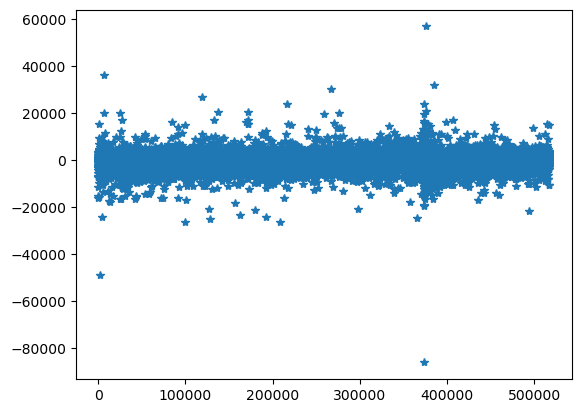

In [105]:
plt.plot(err_test, "*")

In [107]:
pred_actual = pd.DataFrame()
pred_actual['Actual']= vs_test_y
pred_actual['Pred']= pred_linreg_test
pred_actual

,Actual,Pred
514654,5500.0,5403.080249
508111,21800.0,24135.137755
423647,3800.0,5303.940022
35827,17100.0,20578.117555
411082,29000.0,28031.435934
...,...,...
429409,5400.0,5438.938758
326302,12600.0,12849.405349
504079,10300.0,10079.793610
447003,3000.0,7192.276705


<Axes: xlabel='Pred', ylabel='Actual'>

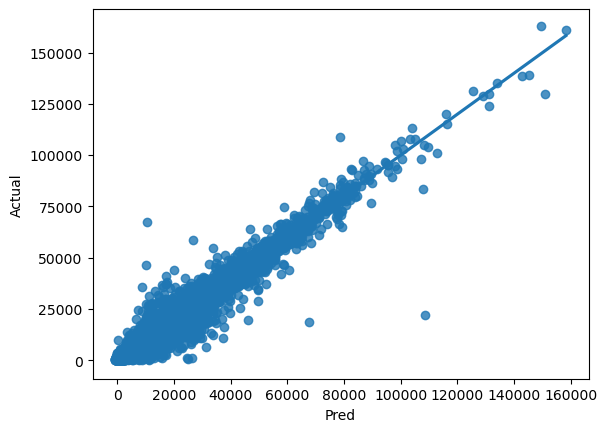

In [108]:
sns.regplot(y='Actual',x='Pred', data=pred_actual)

In [120]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col]  if (x > mean -k*sd)]
    final_list=[x for x in final_list if (x < mean+ k*sd)]
    df1=df.loc[df[col].isin(final_list)];print(df1.shape)
    print("number of outliers removed==>"  ,df.shape[0]-df1.shape[0])

remove_outliers(vs,'sellingprice',2)

(497776, 8)
number of outliers removed==> 19263


In [121]:
df1

,MODEL,TYPE,SIZE,transmission,condition,odometer,mmr,sellingprice
0,653,987,34,0,5.0,16639.0,20500.0,21500.0
1,653,987,34,0,5.0,9393.0,20800.0,21500.0
2,9,279,35,0,45.0,1331.0,31900.0,30000.0
3,591,1383,35,0,41.0,14282.0,27500.0,27750.0
5,76,119,35,0,1.0,5554.0,15350.0,10900.0
...,...,...,...,...,...,...,...,...
517043,620,68,35,0,26.0,35858.0,9950.0,10400.0
517044,34,470,35,0,39.0,66403.0,20300.0,22800.0
517046,7,1098,11,0,5.0,54393.0,30200.0,30800.0
517048,76,119,76,0,38.0,16658.0,15100.0,11100.0


In [123]:
from sklearn.model_selection import train_test_split
df1_train,df1_test=train_test_split(df1,test_size=.2)

In [124]:
df1_train_x = df1_train.drop(columns=['sellingprice'],axis=1)
df1_train_y=  df1_train['sellingprice']

df1_test_x = df1_test.drop(columns=['sellingprice'],axis=1)
df1_test_y=  df1_test['sellingprice']

In [125]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [128]:
lin.fit(df1_train_x,df1_train_y)

LinearRegression()

In [129]:
pred_lin_test=linreg.predict(df1_test_x)

In [130]:
Rsquare = lin.score(df1_train_x, df1_train_y)
Rsquare

0.9570299865868318

In [131]:
Rsquare = lin.score(df1_train_x, df1_train_y)
N = df1_train_x.shape[0] # Rows
K = df1_train_x.shape[1] # columns 

Adju_Rsquare = 1 -( 1- Rsquare) * (N - 1) / (N - K - 1)
Adju_Rsquare

0.9570292312351751

In [132]:
Rsquare = lin.score(df1_train_x, df1_train_y)
Rsquare

0.9570299865868318

In [133]:
err_test=df1_test_y-pred_lin_test
err_test.mean()

-33.363805698494076

In [134]:
MAPE_test = np.mean(np.abs((err_test*100)/df1_test_y))
MAPE_test

16.250371514088236

In [135]:
acc=100-MAPE_test
acc

83.74962848591176

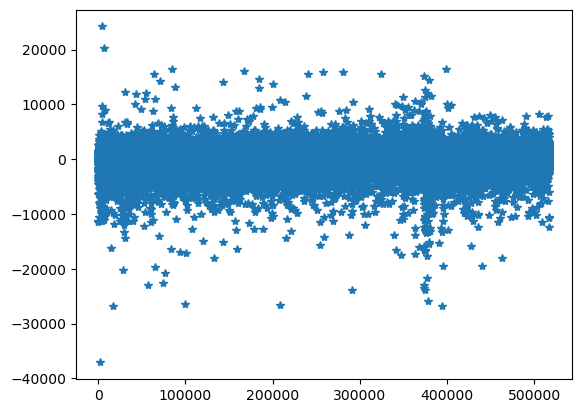

In [136]:
plt.plot(err_test, "*")

In [138]:
pred_actual = pd.DataFrame()
pred_actual['Actual']= df1_test_y
pred_actual['Pred']= pred_lin_test
pred_actual

,Actual,Pred
103128,16000.0,16477.734700
397565,22100.0,22037.293420
342299,1800.0,2063.696954
44962,12800.0,12271.593027
284655,20400.0,19170.465179
...,...,...
301685,3600.0,2619.938436
416812,300.0,469.775187
265300,950.0,673.430314
315718,14000.0,13825.100647


<Axes: xlabel='Pred', ylabel='Actual'>

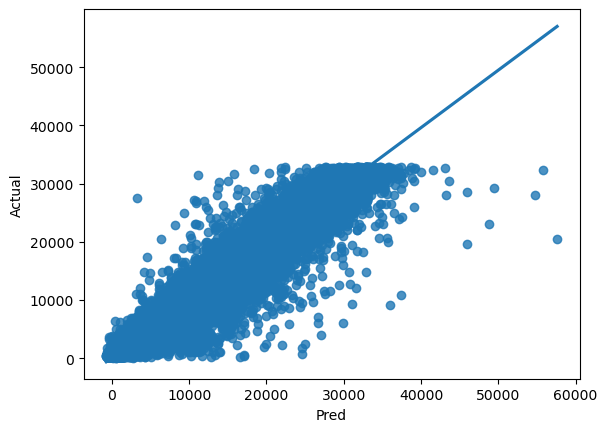

In [139]:
sns.regplot(y='Actual',x='Pred', data=pred_actual)

# Conclusion

The normal linear model is doing good work using Rsquare ,Adj Rsquare,and accuracy